# Project Brief: Fraud Detection for Online Payment Platform

## Overview
The Fraud Detection dataset is a critical asset for our business, providing invaluable insights and opportunities to enhance the security and trustworthiness of our online payment platform. This dataset represents transactions and user-related data collected over time from our platform, with the primary goal of developing an advanced predictive model to identify potentially fraudulent transactions.

## Context
Our online payment platform processes millions of transactions daily, making it vulnerable to various types of fraudulent activities. These activities pose a significant threat to both our business and our customers. To safeguard our platform and enhance user experience, we aim to leverage the power of data science and machine learning to proactively detect and prevent fraudulent transactions.

## Objectives
### 1. Fraud Detection Model
You are required to build an advanced machine learning model to predict whether a given transaction is potentially fraudulent or not. This model will be vital for real-time decision-making, allowing us to flag and investigate suspicious activities promptly.

### 2. Enhanced Security
The primary aim is to enhance the security of our platform. By identifying fraudulent transactions early, we can take preventive measures to protect our customers and our business from financial losses.

### 3. User Trust
Fraud detection directly impacts the trust our customers have in our platform. Accurate and efficient detection of fraudulent activities assures our users that their transactions are safe and secure.

### 4. Operational Efficiency
Implementing automated fraud detection reduces the manual effort required for monitoring transactions, allowing our business to operate more efficiently.

## Business Impact
The success of this project has significant implications for our business. An effective fraud detection system will help us maintain the integrity of our platform, foster user trust, and ensure the sustainability of our operations. By reducing fraud-related losses and improving the overall user experience, we aim to achieve long-term growth and success in the competitive online payment industry.

In [1]:
!pip install gdown

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1syawlOQLjgMkmA-Ck28VsuAS8JmLdnEf'

output = 'Fraud_Detection_Dataset.csv'

gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1syawlOQLjgMkmA-Ck28VsuAS8JmLdnEf
From (redirected): https://drive.google.com/uc?id=1syawlOQLjgMkmA-Ck28VsuAS8JmLdnEf&confirm=t&uuid=bd5b5887-2bf8-4d51-879d-d08efc30a49d
To: /kaggle/working/Fraud_Detection_Dataset.csv
100%|██████████| 1.65G/1.65G [00:08<00:00, 186MB/s] 


'Fraud_Detection_Dataset.csv'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/kaggle/working/Fraud_Detection_Dataset.csv')

In [5]:
df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,61037029,7480,448.99,2021-10-20 15:56:32,3346,Discover,SGP,Scholarship,Server,255.134.160.201,...,34,2.78,Russia,CHF,Invoice Payment,679,aim.com,14,Retina Scan,0
5999996,56515851,5636,841.39,2021-06-14 02:10:00,8415,Alipay,ZAF,Loan,Digital Camera,48.190.84.14,...,80,2.60,Malaysia,HUF,Membership,706,cox.net,10,Social Media Login,1
5999997,66863972,5554,197.28,2021-11-06 22:33:19,4231,Afterpay,CAN,Service Charge,Barcode Scanner,7.21.196.39,...,12,1.35,Egypt,HKD,Admission,310,live.co.uk,14,Mobile App Notification,0
5999998,13449701,1275,358.33,2022-03-13 15:02:35,9614,JCB,UK,Fine,Robot,211.202.242.100,...,57,1.29,China,AED,Expense Reimbursement,460,rediffmail.com,16,Authentication App,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [7]:
df.shape

(6000000, 32)

## **Verifying and Inspecting Data**
**Check for NULL/MISSING values**

In [10]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

Transaction ID                       0.0
User ID                              0.0
Transaction Authentication Method    0.0
Merchant's Business Age              0.0
User's Email Domain                  0.0
User's Credit Score                  0.0
Transaction Purpose                  0.0
Transaction Currency                 0.0
User's Device Location               0.0
Merchant's Reputation Score          0.0
User's Transaction History           0.0
Transaction Time of Day              0.0
Time Taken for Transaction           0.0
Location Distance                    0.0
Transaction Status                   0.0
User Account Status                  0.0
User Gender                          0.0
User Income                          0.0
User Occupation                      0.0
User Age                             0.0
Merchant Category                    0.0
Operating System                     0.0
Browser Type                         0.0
IP Address                           0.0
Device Type     

In [9]:
# percentage of missing values in each row
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

0          0.0
4000007    0.0
4000005    0.0
4000004    0.0
4000003    0.0
          ... 
1999998    0.0
1999997    0.0
1999996    0.0
1999995    0.0
5999999    0.0
Length: 6000000, dtype: float64

In [13]:
# print summary statistics for numerical variables
df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


Based on the information provided in the table, here are the range summaries for the variables:

- **Transaction Amount**: Spans from a minimum of 1 dollar to a maximum of 1000 dollars.

- **User Age**: Ranges from a minimum age of 18 years to a maximum age of 80 years.

- **User Income**: Extends from a minimum income of 1000 dollars to a maximum income of 100,000 dollars.

- **Location Distance**: Encompasses distances from a minimum of 1 meter to a maximum of 100 meters.

- **Time Taken for Transaction**: Varies between a minimum time of 1 minute and a maximum time of 6 minutes.

- **User's Transaction History**: Ranges from a minimum value of 1 to a maximum value of 100.

- **Merchant's Reputation Score**: Spans from a minimum score of 1 to a maximum score of 5.

- **User's Credit Score**: Extends from a minimum score of 300 to a maximum score of 850.

- **Merchant's Business Age**: Encompasses business ages from a minimum of 1 year to a maximum of 20 years.

These ranges provide a comprehensive understanding of the variability within each variable, which is essential for data analysis and modeling.

## Checking for Outliners

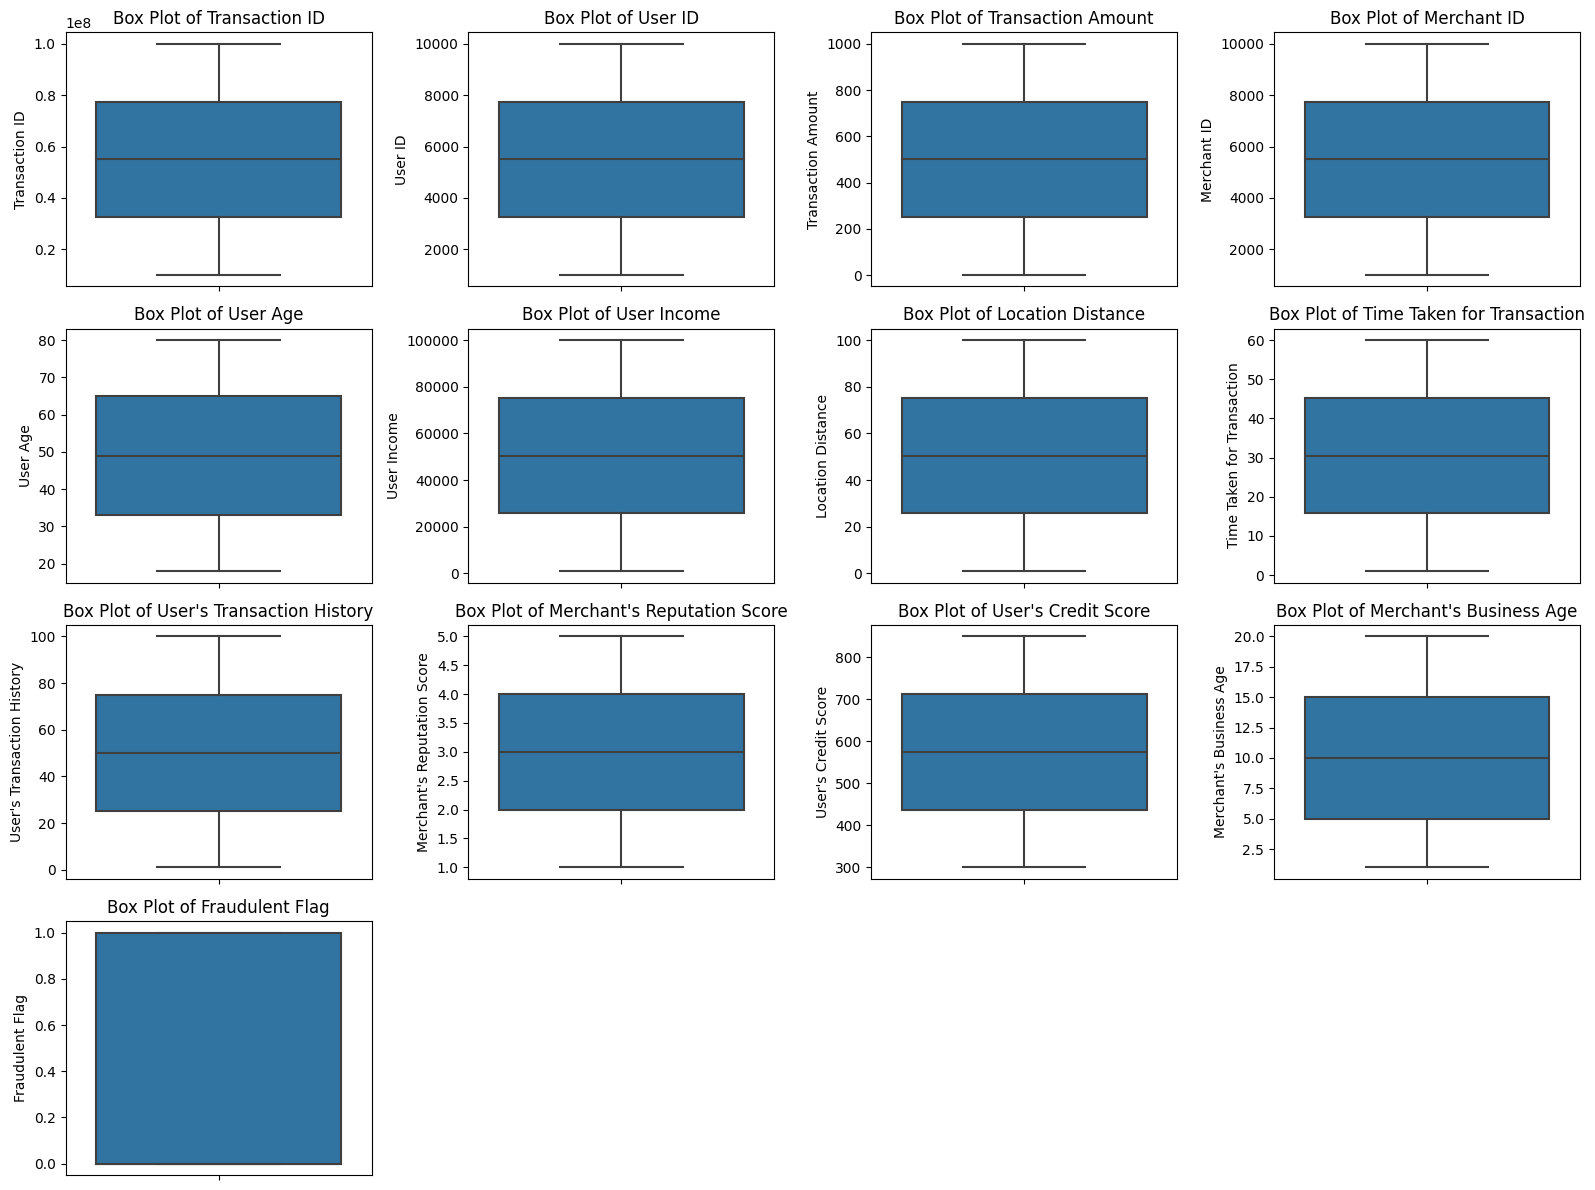

In [21]:
# Select numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns needed for subplots
num_cols = len(numerical_columns.columns)
num_rows = (num_cols // 4) + 1

# Set the figure size
plt.figure(figsize=(16, 12))

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 4, i + 1)  # Create subplots in a 4x4 grid
    sns.boxplot(data=numerical_columns, y=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

## EXPLORATORY DATA ANALYSIS

From The Above Visualisation, There are not Outliners

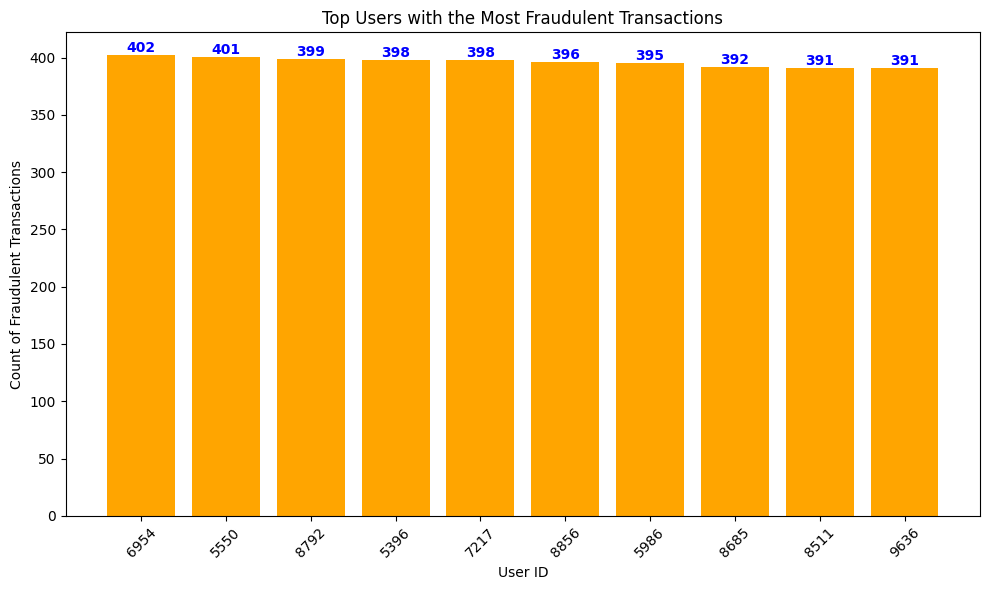

In [29]:
# convert to object
df['User ID'] = df['User ID'].astype(str)

# Group by User ID and sum the fraudulent flags
fraudulent_users = df[df['Fraudulent Flag'] == 1].groupby("User ID")['Fraudulent Flag'].sum().reset_index()

# Sort the users by the count of fraudulent flags in descending order to get the top users
top_fraudulent_users = fraudulent_users.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top users
top_10_users = 10  
top_users = top_fraudulent_users.head(top_10_users)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_users["User ID"], top_users['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Users with the Most Fraudulent Transactions')
plt.xlabel("User ID")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

These are the top Users with the Most Fradulent Transactions

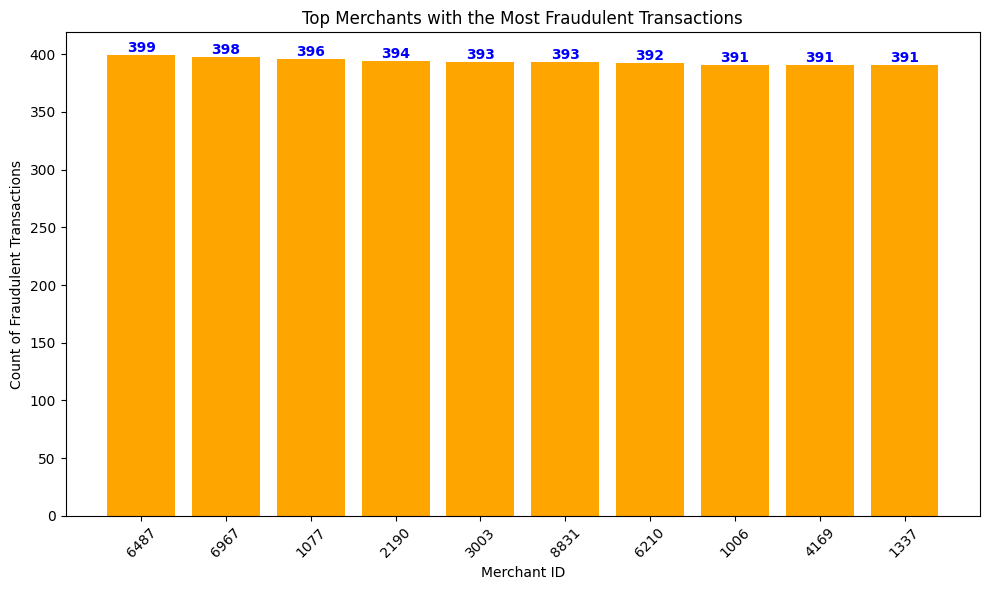

In [28]:
# convert to object
df['Merchant ID'] = df['Merchant ID'].astype(str)

# Group by User ID and sum the fraudulent flags
fraudulent_merchants = df[df['Fraudulent Flag'] == 1].groupby("Merchant ID")['Fraudulent Flag'].sum().reset_index()

# Sort the users by the count of fraudulent flags in descending order to get the top users
top_fraudulent_merchants = fraudulent_merchants.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top users
top_10_merchants = 10  
top_merchants = top_fraudulent_merchants.head(top_10_merchants)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_merchants["Merchant ID"], top_merchants['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Merchants with the Most Fraudulent Transactions')
plt.xlabel("Merchant ID")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

These Are The Merchants With the Most Fradulent Transactions.

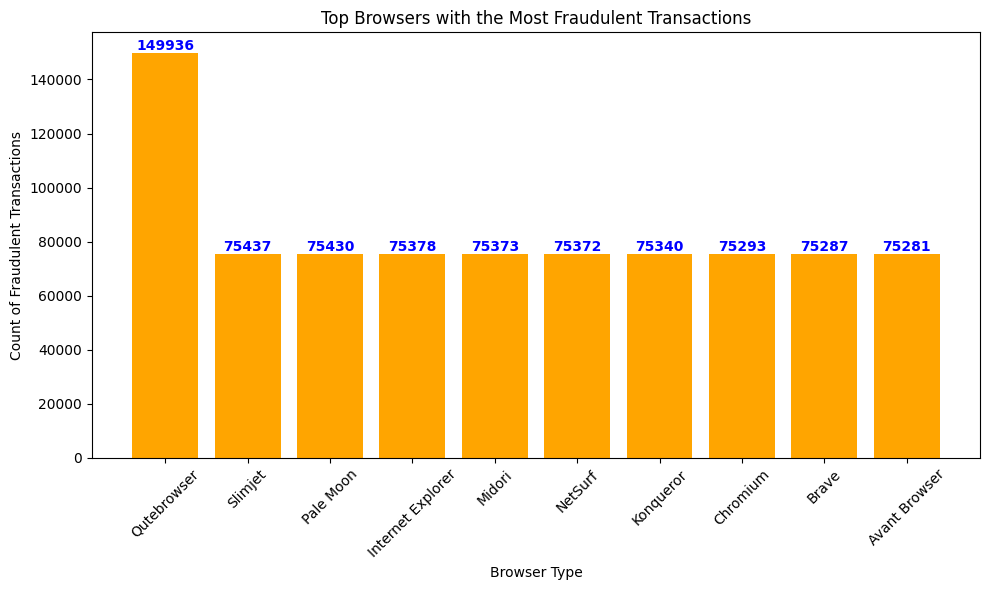

In [27]:
# Group by User ID and sum the fraudulent flags
fraudulent_browsers = df[df['Fraudulent Flag'] == 1].groupby("Browser Type")['Fraudulent Flag'].sum().reset_index()

# Sort the browsers by the count of fraudulent flags in descending order to get the top browsers
top_fraudulent_browsers = fraudulent_browsers.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top browsers
top_10_browsers = 10  
top_browsers = top_fraudulent_browsers.head(top_10_browsers)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_browsers["Browser Type"], top_browsers['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Browsers with the Most Fraudulent Transactions')
plt.xlabel("Browser Type")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

These Are The Browsers with The Most Fradulent Transactions

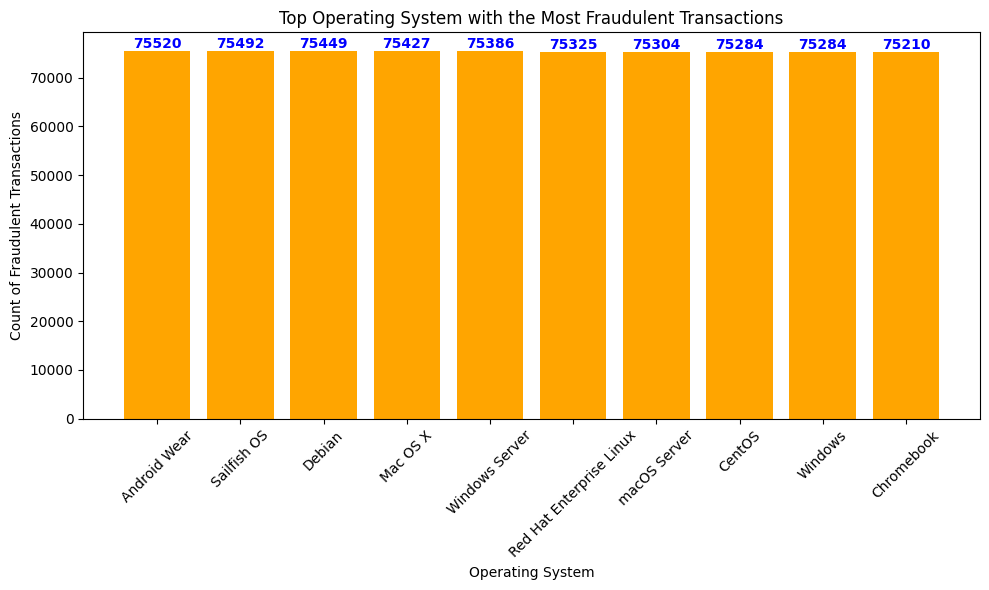

In [31]:
# Group by Operating System and sum the fraudulent flags
fraudulent_OS = df[df['Fraudulent Flag'] == 1].groupby("Operating System")['Fraudulent Flag'].sum().reset_index()

# Sort the browsers by the count of fraudulent flags in descending order to get the top browsers
top_fraudulent_OS = fraudulent_OS.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top browsers
top_10_OS = 10  
top_OS = top_fraudulent_OS.head(top_10_OS)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_OS["Operating System"], top_OS['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Operating System with the Most Fraudulent Transactions')
plt.xlabel("Operating System")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

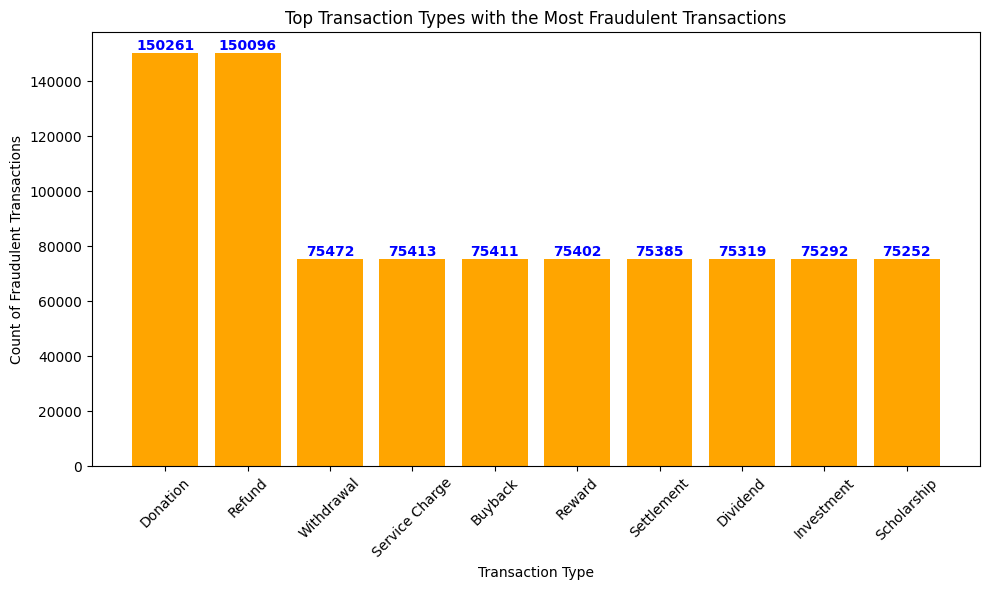

In [32]:
# Group by Transaction Type and sum the fraudulent flags
fraudulent_transaction_types = df[df['Fraudulent Flag'] == 1].groupby("Transaction Type")['Fraudulent Flag'].sum().reset_index()

# Sort the Transaction Type by the count of fraudulent flags in descending order to get the top Transaction Type
top_fraudulent_transaction_types = fraudulent_transaction_types.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top Transaction Type
top_10_transaction_types = 10  
top_transaction_types = top_fraudulent_transaction_types.head(top_10_transaction_types)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_transaction_types["Transaction Type"], top_transaction_types['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Transaction Types with the Most Fraudulent Transactions')
plt.xlabel("Transaction Type")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

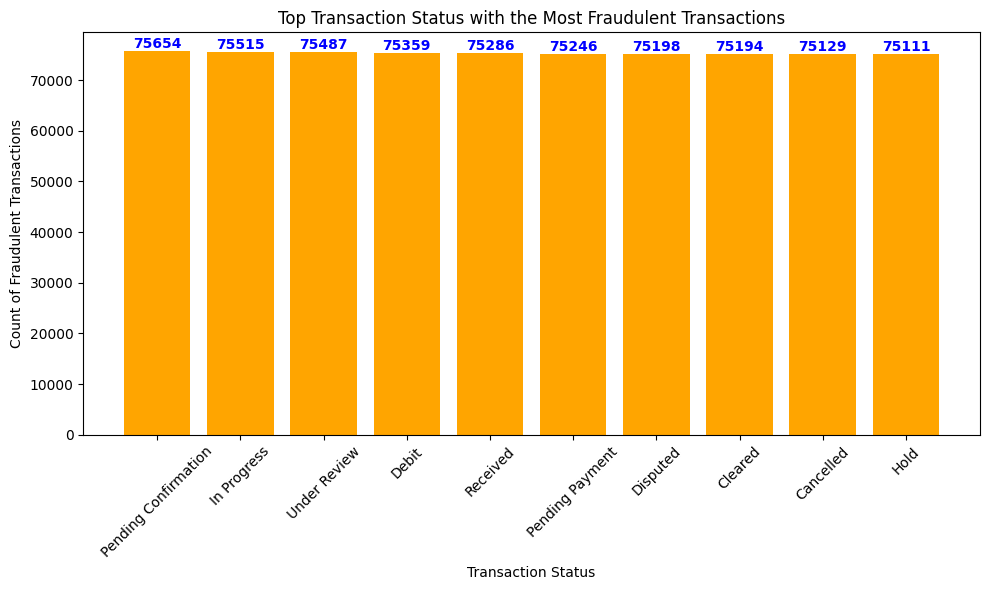

In [34]:
# Group by Transaction status and sum the fraudulent flags
fraudulent_transaction_status = df[df['Fraudulent Flag'] == 1].groupby("Transaction Status")['Fraudulent Flag'].sum().reset_index()

# Sort the Transaction status by the count of fraudulent flags in descending order to get the top Transaction Type
top_fraudulent_transaction_status = fraudulent_transaction_status.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top Transaction status
top_10_transaction_status = 10  
top_transaction_status = top_fraudulent_transaction_status.head(top_10_transaction_status)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_transaction_status["Transaction Status"], top_transaction_status['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Transaction Status with the Most Fraudulent Transactions')
plt.xlabel("Transaction Status")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

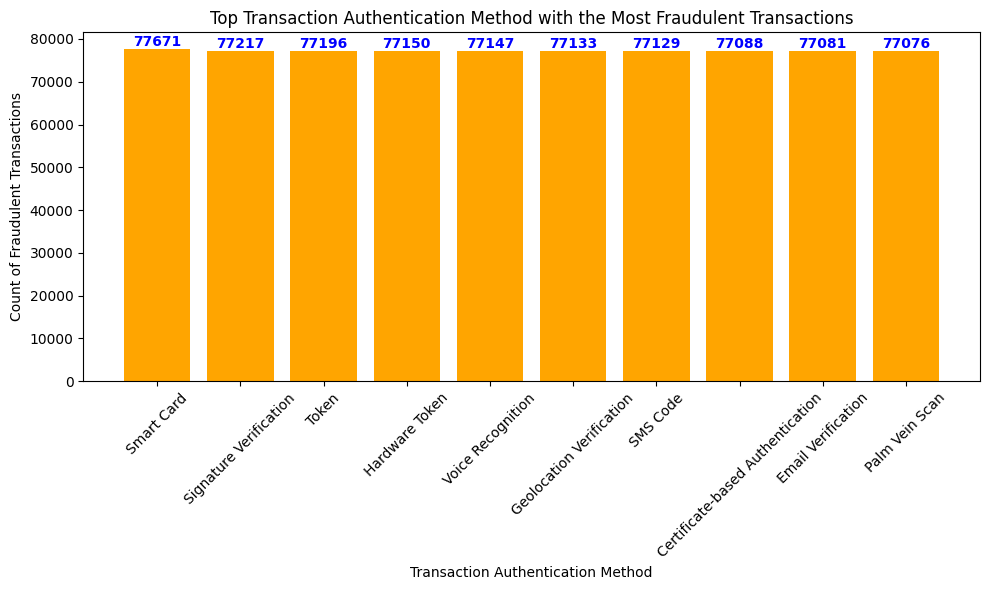

In [36]:
# Group by Transaction Authentication Method and sum the fraudulent flags
fraudulent_transaction_auth = df[df['Fraudulent Flag'] == 1].groupby("Transaction Authentication Method")['Fraudulent Flag'].sum().reset_index()

# Sort the Transaction Authentication Method by the count of fraudulent flags in descending order to get the top Transaction Type
top_fraudulent_transaction_auth = fraudulent_transaction_auth.sort_values(by='Fraudulent Flag', ascending=False)

# Display the top TTransaction Authentication Method
top_10_transaction_auth = 10  
top_transaction_auth = top_fraudulent_transaction_auth.head(top_10_transaction_auth)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_transaction_auth["Transaction Authentication Method"], top_transaction_auth['Fraudulent Flag'], color='orange')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue', fontweight='bold')

# Customize the chart
plt.title('Top Transaction Authentication Method with the Most Fraudulent Transactions')
plt.xlabel("Transaction Authentication Method")
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

## Correlation Matrix

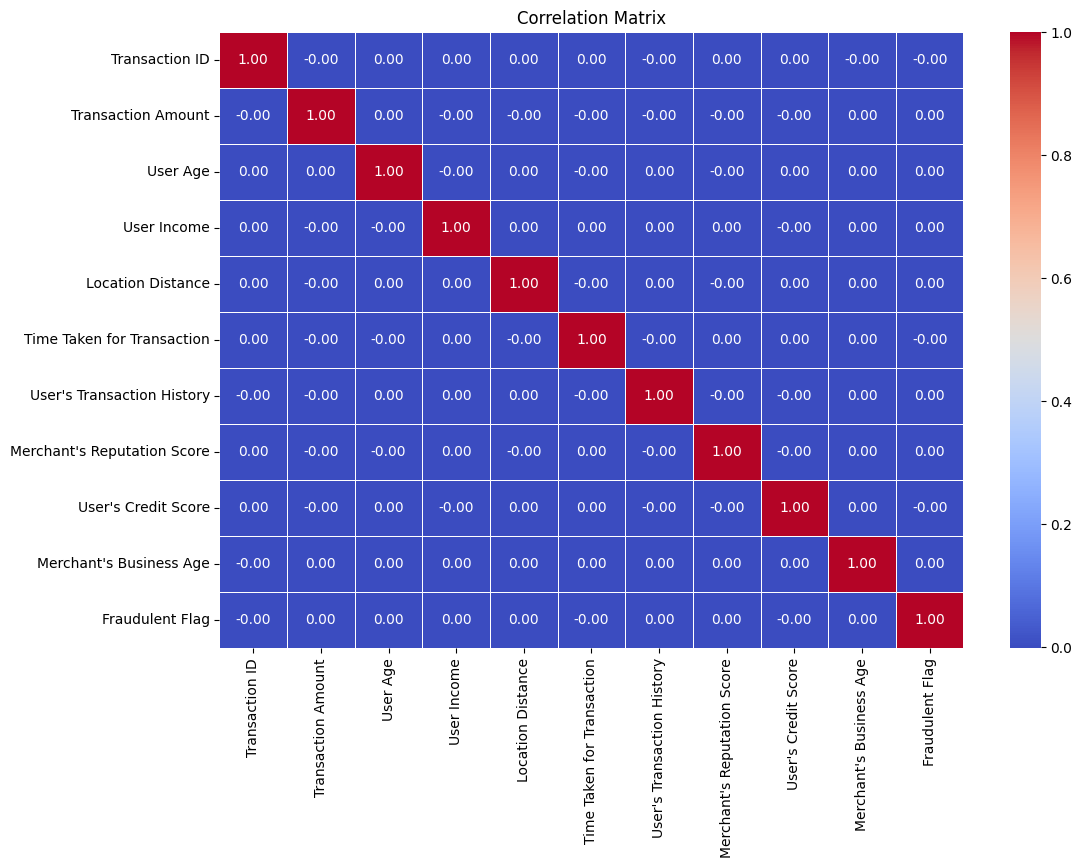

In [38]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()